# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep
Learning.

1. Linear Regression
2. Logistic Regression
3. Artificial Neural Networks
4. Deep Neural Networks
5. **Convolutional Neural Networks**

## 4. Convolutional Neural Networks

Convolutional networks are simply neural networks that use convolution in place
of general matrix multiplication in at least one of their layers.

## Convolutional Neural Networks with Keras and TensorFlow

## 1. Load data

#### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(12049)


2023-10-16 14:56:59.041247: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 14:56:59.074528: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


#### Getting the data

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


#### Explore visual data

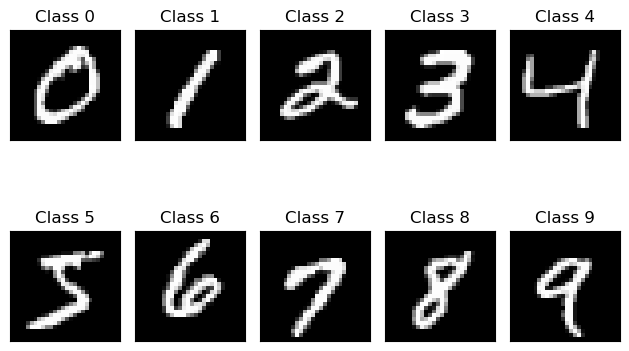

In [3]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()


In [4]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_test.shape)


X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_train.shape (10000,)


#### Reshaping and normalizing the inputs

In [5]:
# reshaping the inputs

if tf.keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print('X_train reshape:', X_train.shape)
print('X_test reshape:', X_test.shape)


X_train reshape: (60000, 28, 28, 1)
X_test reshape: (10000, 28, 28, 1)


#### Convert class vectors to binary class matrices

In [6]:
# 10 classes
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)


y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

#### Add the input-, hidden- and output-layers

In [7]:
# building a linear stack of layers with the sequential model
model = tf.keras.models.Sequential()

# Add the input layer and hidden layer 1
model.add(tf.keras.layers.Conv2D(
    32, 
    kernel_size=(3, 3), 
    activation='relu', 
    input_shape=input_shape)
)

# Add the input layer and hidden layer 2
model.add(tf.keras.layers.Conv2D(
    64, 
    (3, 3), 
    activation='relu')
)

# Flatten convolutional output
model.add(tf.keras.layers.Flatten())

# Add the input layer and hidden layer 3
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))


2023-10-16 14:57:00.183134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 14:57:00.197417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 14:57:00.197554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 14:57:00.197919: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the

#### Model visualization

In [8]:
# plot a Keras model
tf.keras.utils.plot_model(
    model, 
    to_file='img/model05_cnn.png',
    show_shapes=True, 
    show_layer_names=True
)

# prints a summary representation of your model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4,738,826
Trainable params: 4,738,826
Non-trainable params: 0
_________________________________________________________________


![Deep neural network](src/img/model05_cnn.png)

## 3. Compile model

In [9]:
# compiling the sequential model
model.compile(
    "rmsprop",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)


## 4. Fit model

In [10]:
# training the model and saving metrics in history
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=256,
    epochs=50,
    verbose=2,
    validation_data=(X_test, y_test_cat),
)


Epoch 1/50


2023-10-16 14:57:00.796142: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8800
2023-10-16 14:57:00.858921: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-16 14:57:00.859520: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-16 14:57:00.859536: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-10-16 14:57:00.860076: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-16 14:57:00.860097: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-10-16 14:57:00.901000: I tensorflow/stream_executor/cuda/c

235/235 - 2s - loss: 0.1925 - categorical_accuracy: 0.9425 - val_loss: 0.0567 - val_categorical_accuracy: 0.9814 - 2s/epoch - 10ms/step
Epoch 2/50
235/235 - 1s - loss: 0.0431 - categorical_accuracy: 0.9870 - val_loss: 0.0383 - val_categorical_accuracy: 0.9873 - 1s/epoch - 6ms/step
Epoch 3/50
235/235 - 2s - loss: 0.0239 - categorical_accuracy: 0.9926 - val_loss: 0.0383 - val_categorical_accuracy: 0.9872 - 2s/epoch - 6ms/step
Epoch 4/50
235/235 - 2s - loss: 0.0130 - categorical_accuracy: 0.9958 - val_loss: 0.0406 - val_categorical_accuracy: 0.9887 - 2s/epoch - 7ms/step
Epoch 5/50
235/235 - 1s - loss: 0.0084 - categorical_accuracy: 0.9974 - val_loss: 0.0490 - val_categorical_accuracy: 0.9866 - 1s/epoch - 6ms/step
Epoch 6/50
235/235 - 2s - loss: 0.0055 - categorical_accuracy: 0.9983 - val_loss: 0.0481 - val_categorical_accuracy: 0.9879 - 2s/epoch - 6ms/step
Epoch 7/50
235/235 - 1s - loss: 0.0033 - categorical_accuracy: 0.9991 - val_loss: 0.0407 - val_categorical_accuracy: 0.9903 - 1s/epoch

## 5. Evaluate model

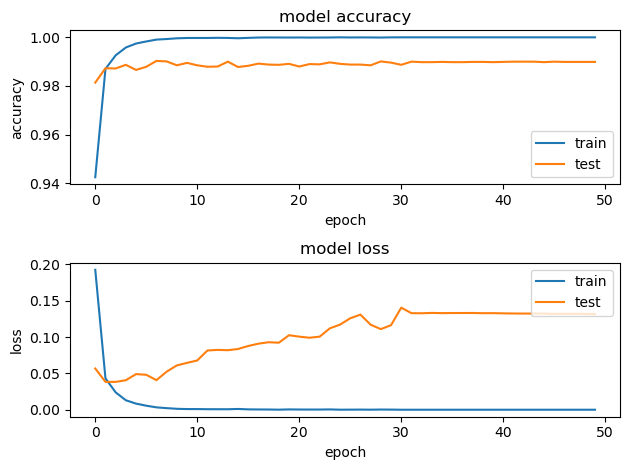

In [11]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [12]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat)
print(
    "Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(
        test_loss, test_acc
    )
)


313/313 [==============================] - 0s 1ms/step - loss: 0.1316 - categorical_accuracy: 0.9899
Evaluation result on Test Data:
Loss = 0.13159455358982086
Accuracy = 0.9898999929428101


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)